# Autoencoder 

In [23]:
# packages to import
import numpy as np

# getting the digits dataset
from sklearn.datasets import load_digits

# our neural network class / module
from nn.nn import NeuralNetwork

# for plotting
import matplotlib.pyplot as plt

## step 1. Load the digits dataset

structure of digits dataset
(1797, 64)
(1797,)

 first sample
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

 Plot first sample


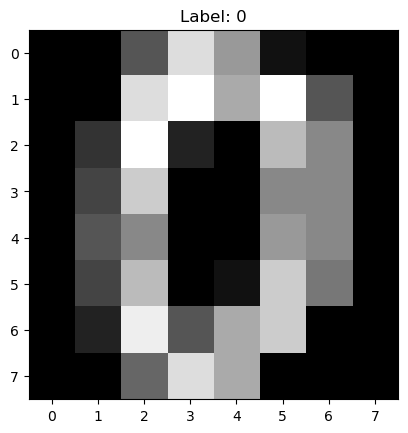

In [24]:
digits = load_digits()

print("structure of digits dataset")
print(digits.data.shape) # 1797 samples, 64 features  - X matrix
print(digits.target.shape) # 1797 samples - y (labels) vector

print("\n first sample")
print(digits.data[0])  # first sample 

# plot the first sample
print("\n Plot first sample")
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.title(f"Label: {digits.target[0]}")
plt.show()

## step 2:  splt into training and validation sets

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(digits["data"],
                                                                       digits["target"],
                                                                       test_size = 0.2, # 20% for validation 
                                                                       random_state = 42
                                                                       )

print("Training set: (instances, features) ", X_train.shape)
print("Validation set: (instances, features) ", X_val.shape)

Training set: (instances, features)  (1437, 64)
Validation set: (instances, features)  (360, 64)


## step 3: Generate an instance of your NeuralNetwork class with a 64x16x64 autoencoder architecture.

Generating an instance of NeuralNetwork class requires choosing the below parameters: 
- nn_arch (neural net architecture), including dimensions and activation function per layer
- lr (learning rate)
- batch_size (size of mini-batches used for training)
- loss_function (mean squared error or binary cross entropy)
- epochs (max number for training)

### How did I select hyperparameter values?

For **epochs**: I initially choose a large number (500) as training for this dataset doesn't take a prohibitatively long time for this each . I then doubled check that this number was sufficent by looking at the plot of validation and training loss per epoch. To double check that the loss converged, I increaed the number of epochs to 700 - and didn't observe any futher jump in loss reduction so I believe this choice for number of epochs was likely appropriate. 

For **loss_function**: I chose mse instead of bce as the data we trying to predict / replicate is continous (i.e. a regression not classification problem) where this loss function is more appropriate.

For **batch_size**: I knew I needed to choose a small enough batch size (relative to the size of the training dataset) so I could perform training within the memory constraints of my laptop. However, the batch size also needed to be large enough to prevent stochasticity from inhibiting training.  I thus took inspiration from the default auto setting in sklearn's MLPRegressor function (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor), and initially set batch size as 200. I then measured the time it took for the model to train on my laptop, and the checked the below plot loss per epoch of training and validation. since the time it took for the model to train was not prohibitative, and the loss per epoch didn't 'bounce' around a lot, I thought this batch size was acceptable. However, in the future, performing a grid search to select a value would be ideal.   

For **learning_rate**: I took inspiration from the default setting in sklearn's MLPRegressor function (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor), and initially set the learning rate to be 0.001. similarly, in the future, performing a grid search with at least a few other learning rates (0.01, 0.001, 0.0001) to select a value would be ideal.  

For **nn_arch**: since the input features varied outside of the range 0 and 1, I chose 'relu' as the activation function for the output layer to help the output data better resemble the input data ('sigmoid' would have restricted the output to be between 0 and 1). For all hidden layers, I set the activation function to be 'relu', since this activation function is more widely useful as it doesn't have problems with vanishing gradients, which could cause problems in training. 

For the purposes of this assignment I chose the simplest neural archecture that would fufill 64x16x64 encoder architecture requirement. However, in the future it would be best to perform a grid search on the training set to investigate whether adding extra hidden layers would improve model performance. 


In [26]:
# Define the hyperparameters

# neural network architecture
# needs to be a 64x16x64 autoencoder architecture
nn_arch =  [{"input_dim": 64, "output_dim": 16, "activation": "relu"},
                      {"input_dim": 16, "output_dim": 64, "activation": "relu"}]
                  

#batch size
batch_size = 200

# learning rate
lr = 0.001

# number of epochs
epochs = 700

# loss function
loss_function = "mse"

# Initialize the neural network structure
nn_model = NeuralNetwork(nn_arch = nn_arch, lr = lr, epochs = epochs, batch_size = batch_size, loss_function=loss_function,
                                              seed = 42
                                              )

## step 4: Train your autoencoder on the training data.

In [27]:
# Fit / train the model
per_epoch_loss_train, per_epoch_loss_val = nn_model.fit(X_train, X_train, X_val, X_val)

## step 5: Plot your training and validation loss by epoch.

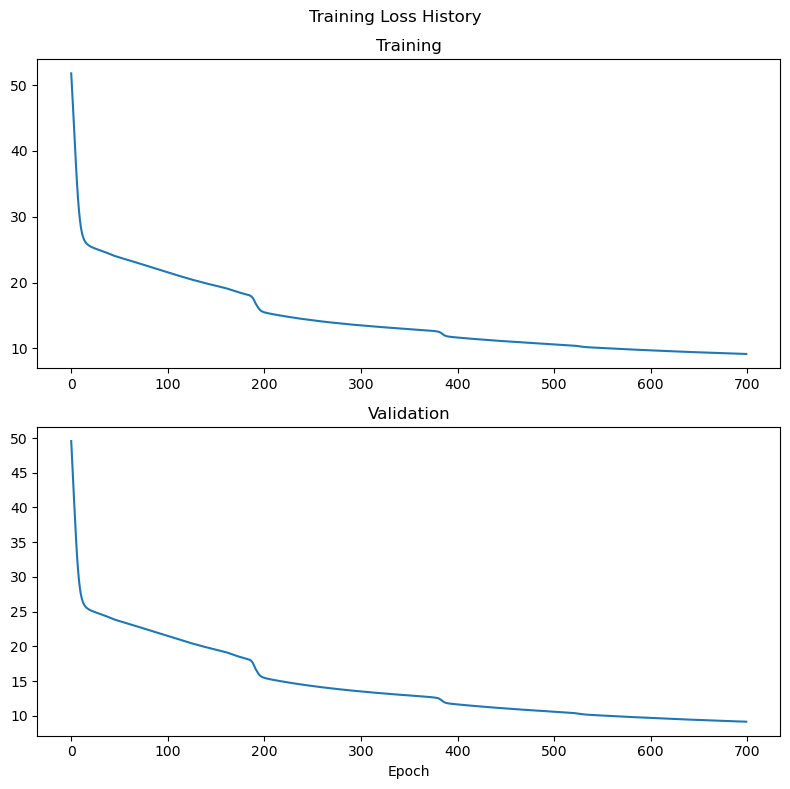

In [28]:
#below code adapted from wk 7 regression logreg.py  

fig, axs = plt.subplots(2, figsize=(8, 8))
fig.suptitle('Training Loss History')
axs[0].plot(np.arange(len(per_epoch_loss_train)), per_epoch_loss_train)
axs[0].set_title('Training')
axs[1].plot(np.arange(len(per_epoch_loss_val)), per_epoch_loss_val)
axs[1].set_title('Validation')
plt.xlabel('Epoch')
fig.tight_layout()
plt.show()

## step 6: Quantify your average reconstruction error over the validation set.

In [30]:
print(per_epoch_loss_val[-1]) # average loss on validation set - after training

9.145643164994379


## step 7: Explain why you chose the hyperparameter values you did.

see text under step 3, generate an instance of your NeuralNetwork class with a 64x16x64 autoencoder architecture.